In [1]:
import pandas as pd 
from datasets import load_dataset
import matplotlib.pyplot as plt

dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

df['job_posted_date'] = pd.to_datetime(df.job_posted_date)

c:\Users\georg\anaconda3\envs\course\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
df.sample(5)

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
645478,Data Analyst,"Lead Data Analyst, Influence Operations - USDS","Los Angeles, CA",via LinkedIn,Full-time,False,"California, United States",2023-11-06 12:00:40,False,True,United States,year,172118.5,NaN,TikTok,"['sql', 'express']","{'programming': ['sql'], 'webframeworks': ['ex..."
53340,Software Engineer,Инженер по работе с данными,Anywhere,via LinkedIn,Full-time,True,Russia,2023-05-16 06:46:52,True,False,Russia,None,NaN,NaN,Самокат,"['python', 'sql', 'airflow', 'hadoop']","{'libraries': ['airflow', 'hadoop'], 'programm..."
201833,Data Analyst,Data Analyst Intern,"Amsterdam, Netherlands",via LinkedIn,Temp work and Internship,False,Netherlands,2023-11-07 15:45:14,False,False,Netherlands,None,NaN,NaN,The Kraft Heinz Company,"['spark', 'tableau', 'power bi', 'microsoft te...","{'analyst_tools': ['tableau', 'power bi'], 'li..."
83487,Data Scientist,Data Scientist,"Philadelphia, PA",via Lensa,Full-time,False,"New York, United States",2023-01-23 00:03:24,False,False,United States,None,NaN,NaN,Turing Talent,"['sql', 'python', 'r']","{'programming': ['sql', 'python', 'r']}"
596506,Data Analyst,Sr Data Analyst,"Fort Lauderdale, FL",via BeBee,Full-time,False,"Florida, United States",2023-03-05 09:02:47,True,True,United States,None,NaN,NaN,UnitedHealth Group,"['sql', 'python', 'go', 'databricks', 'excel',...","{'analyst_tools': ['excel', 'looker', 'tableau..."


In [4]:
df_job_country_salary = df.pivot_table(values='salary_year_avg',index='job_country',columns='job_title_short',aggfunc='median')

In [11]:
top_countries = df.job_country.value_counts().head(6).index
df_job_country_salary = df_job_country_salary.loc[top_countries]
df_job_country_salary

job_title_short,Business Analyst,Cloud Engineer,Data Analyst,Data Engineer,Data Scientist,Machine Learning Engineer,Senior Data Analyst,Senior Data Engineer,Senior Data Scientist,Software Engineer
job_country,,,,,,,,,,
United States,90000.0,116100.0,90000.0,125000.0,130000.0,150000.0,110000.0,150000.0,155000.0,130000.0
India,64800.0,NaN,100500.0,147500.0,114008.0,79200.0,111175.0,147500.0,149653.0,79200.0
United Kingdom,56700.0,NaN,87750.0,110000.0,105300.0,149653.0,111175.0,147500.0,157500.0,89100.0
France,89100.0,105968.0,69175.0,98301.5,88128.0,80850.0,111175.0,147500.0,157500.0,142500.0
Germany,89100.0,89100.0,103750.0,147500.0,131560.0,89100.0,111175.0,147500.0,157500.0,84975.0
Spain,86400.0,89100.0,91977.0,133000.0,88128.0,101029.0,111175.0,147500.0,157500.0,77050.0


In [16]:
job_titles = ['Data Analyst','Data Engineer','Data Scientist']
df_job_country_salary = df_job_country_salary[job_titles]
df_job_country_salary

job_title_short,Data Analyst,Data Engineer,Data Scientist
job_country,,,
United States,90000.0,125000.0,130000.0
India,100500.0,147500.0,114008.0
United Kingdom,87750.0,110000.0,105300.0
France,69175.0,98301.5,88128.0
Germany,103750.0,147500.0,131560.0
Spain,91977.0,133000.0,88128.0


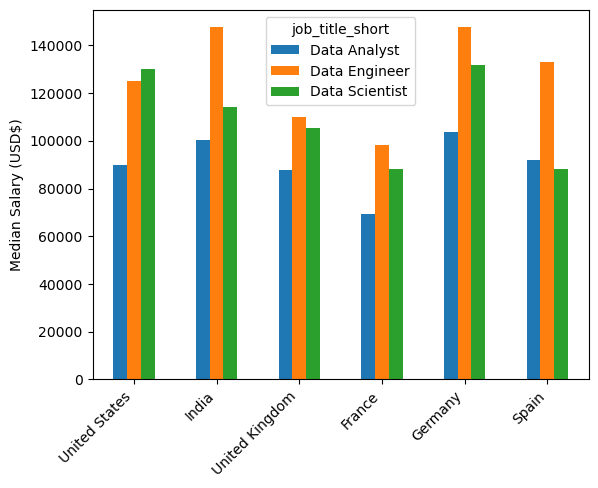

In [18]:
df_job_country_salary.plot(kind='bar')
plt.ylabel('Median Salary (USD$)')
plt.xlabel('')
plt.xticks(rotation=45,ha='right')
plt.show()